

## **Clasificación de Imágenes y Redes Neuronales Convolucionales (CNNs)**

### **1. El Conjunto de Datos SUN**

#### **1.1 Descargando los Datos**
Se  crea un subconjunto de datos que contiene solo 20 categorías, y redimensionamos previamente las imágenes para que su tamaño más largo sea 256 píxeles y también se restringe cada categoría para que tenga exactamente 50 imágenes.

In [ ]:
# This command downloads the files with the prepackaged contents.
!wget -nc http://www.cs.rice.edu/~vo9/deep-vislang/SUN20-train-sm.tar.gz
!wget -nc http://www.cs.rice.edu/~vo9/deep-vislang/SUN20-val.tar.gz
!tar xf SUN20-train-sm.tar.gz
!tar xf SUN20-val.tar.gz

--2025-01-13 03:26:04--  http://www.cs.rice.edu/~vo9/deep-vislang/SUN20-train-sm.tar.gz
Resolving www.cs.rice.edu (www.cs.rice.edu)... 128.42.207.26
Connecting to www.cs.rice.edu (www.cs.rice.edu)|128.42.207.26|:80... connected.
HTTP request sent, awaiting response... 301 Moved permanently
Location: https://www.cs.rice.edu/~vo9/deep-vislang/SUN20-train-sm.tar.gz [following]
--2025-01-13 03:26:05--  https://www.cs.rice.edu/~vo9/deep-vislang/SUN20-train-sm.tar.gz
Connecting to www.cs.rice.edu (www.cs.rice.edu)|128.42.207.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39744791 (38M) [application/x-gzip]
Saving to: ‘SUN20-train-sm.tar.gz’

SUN20-train-sm.tar. 100%[===================>]  37.90M   777KB/s    in 51s     

2025-01-13 03:26:57 (755 KB/s) - ‘SUN20-train-sm.tar.gz’ saved [39744791/39744791]

--2025-01-13 03:26:57--  http://www.cs.rice.edu/~vo9/deep-vislang/SUN20-val.tar.gz
Resolving www.cs.rice.edu (www.cs.rice.edu)... 128.42.207.26
Connecting to www

#### **1.2 Creación de un cargador de datos personalizado**
En Pytorch, una clase de conjunto de datos debe heredar de `torch.utils.data.Dataset` y debe sobreescribir dos métodos: `__getitem__` y `__len__`. Estos métodos deben devolver un elemento y la cantidad de elementos respectivamente.

In [ ]:
import os, json, pickle, random
import torch.utils.data
from PIL import Image

# Simple implementation of a custom data loading class for our SUN20 dataset.
class SUN20(torch.utils.data.Dataset):

  # Initialize the class e.g. load files, preprocess, etc.
  def __init__(self, split = 'train', transform = None):

    # These are the 20 categories selected.
    self.categories = open('SUN20/' + split + '/ClassName.txt').read().split('\n')[:-1]
    self.categories = sorted(self.categories)
    self.category2index = {category: idx for (idx, category) in enumerate(self.categories)}
    self.transform = transform

    # Compile a list of images and corresponding labels.
    self.imagepaths = []
    self.labels = []
    for category in self.categories:
      category_directory = 'SUN20/' + split + category
      category_imagenames = os.listdir(category_directory)
      self.imagepaths += [os.path.join(category_directory, imagename)
                          for imagename in category_imagenames]
      self.labels += [self.category2index[category]] * len(category_imagenames)

    # Sort imagepaths alphabetically and labels accordingly.
    sorted_pairs = sorted(zip(self.imagepaths, self.labels), key = lambda x: x[0])
    self.imagepaths, self.labels = zip(*sorted_pairs)


  # Return a sample (x, y) as a tuple e.g. (image, label)
  def __getitem__(self, index):
    image = Image.open(self.imagepaths[index]).convert('RGB')
    if self.transform:
      image = self.transform(image)
    return image, self.labels[index]

  # Return the total number of samples.
  def __len__(self):
    return len(self.imagepaths)


#### **1.3 Usando del cargador de datos personalizado**

Se muestra cómo utilizar el conjunto de datos SUN20 mediante nuestra clase de cargador de datos, y cómo explorar imágenes en este conjunto de datos. Siempre es útil escribir código para explorar el conjunto de datos y visualizarlos.

This dataset has 1000 training images
Image 1 is a /a/arch
Image size is 256x389


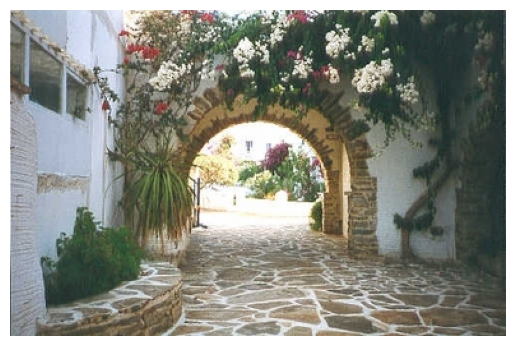

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

trainset = SUN20(split = 'train')
image_index = 1  # Feel free to change this.

# 1. Datasets need to implement the __len__ method for this to work.
print('This dataset has {0} training images'.format(len(trainset)))

# 2. Datasets need to implement the  __getitem__ method for this to work.
img, label = trainset[image_index]  # Returns image and label.

print('Image {0} is a {1}'.format(image_index, trainset.categories[label]))
print('Image size is {0}x{1}'.format(img.height, img.width))

# Show the image.
plt.figure();plt.imshow(img);
plt.grid(False); plt.axis('off'); plt.show()

#### **1.4 Explorando imágenes en SUN20**

***Estadísticas del conjunto de datos:*** En esta sección, se usa el cargador de datos y algunas manipulaciones básicas de imágenes con Python/Pytorch. A continuación, se imprime la cantidad de imágenes tomadas en modo vertical (alto mayor que ancho) en el conjunto de datos para cada categoría y ordenadas en orden decreciente por este número. Incluyo los números que obtuve.

In [ ]:
import torch
from PIL import Image
from collections import defaultdict

# Definir una transformación para cargar imágenes
transform = None

# Inicializar conjuntos de datos
trainset = SUN20(split='train', transform=transform)
valset = SUN20(split='val', transform=transform)

# Inicializar contadores
category_counts = defaultdict(int)

# Función para contar imágenes verticales
def count_vertical_images(dataset):
    for img, label in dataset:
        if img.height > img.width:
            category_counts[dataset.categories[label]] += 1

# Contar imágenes verticales en ambos conjuntos de datos
count_vertical_images(trainset)
count_vertical_images(valset)

# Ordena e imprime los resultados
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
for category, count in sorted_categories:
    print(f"{category}: {count}")

/s/shower: 88
/t/tower: 75
/s/skyscraper: 43
/s/sauna: 42
/a/arch: 41
/b/bathroom: 41
/l/lighthouse: 40
/t/tree_house: 38
/d/dentists_office: 19
/h/hot_spring: 13
/l/library/indoor: 13
/v/volcano: 13
/m/mansion: 10
/j/jacuzzi/indoor: 9
/l/laundromat: 9
/b/butte: 6
/m/marsh: 6
/m/mountain: 6
/l/living_room: 4
/l/lecture_room: 3


**Nota:** Este es solo un ejercicio de calentamiento, pero es importante hacerlo antes de comenzar cualquier proyecto: Explorar el conjunto de datos. Claramente, este conjunto de datos no es ideal, ya que algunas categorías tienen muchas más imágenes para entrenamiento que otras. Sin embargo, el conjunto de validación tiene una cantidad igual de imágenes. Esto es algo que debemos tener en cuenta.

***Visualización:*** En esta sección, se visualizan algunas de las imágenes del conjunto de datos de entrenamiento. Se muestran algunas imágenes organizadas en una cuadrícula de 4x12 para una categoría determinada como una sola imagen.

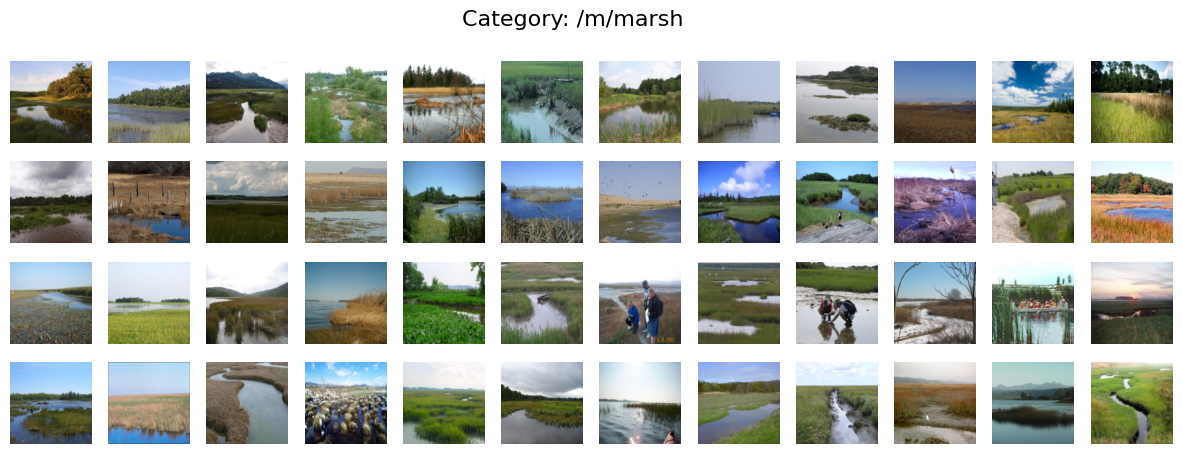

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torchvision import transforms

# Definir la transformación para redimensionar las imágenes
resize_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Cambiar el tamaño de las imágenes a 128x128 píxeles
    transforms.ToTensor()
])

def show_images_in_grid(category_name, num_images=48):
    # Inicializar conjuntos de datos
    trainset = SUN20(split='train', transform=resize_transform)

    # Buscar imágenes para la categoría especificada
    category_index = trainset.category2index[category_name]
    image_paths = [path for path, label in zip(trainset.imagepaths, trainset.labels) if label == category_index]

    # Cargar y preparar imágenes
    images = []
    for path in image_paths[:num_images]:
        img = Image.open(path).convert('RGB')
        img = resize_transform(img).numpy().transpose(1, 2, 0)  # Convertir a array numpy
        images.append(img)

    # Crear una cuadrícula de imágenes
    grid_size = (4, 12)  # 4 filas y 12 columnas
    fig, axes = plt.subplots(*grid_size, figsize=(15, 5))
    for ax, img in zip(axes.flatten(), images):
        ax.imshow(img)
        ax.axis('off')

    plt.suptitle(f'Category: {category_name}', fontsize=16)
    plt.show()

# Mostrar imágenes de la categoría "pantano"
show_images_in_grid("/m/marsh")


**Note:** Hopefully after visualzing the category `butte` you can visualize what this word really means.

### **2. Clasificadores Lineales**
En esta sección, se explora cómo definir y entrenar clasificadores lineales para clasificar imágenes en una de las 20 categorías del conjunto de datos SUN20 que se acaba de definir en la sección anterior.

#### **2.1 Definiendo un clasificar lineal**


Se construye un clasificador lineal binario y entrena usando SGD. Para este propósito, se usa la biblioteca Pytorch. No se necesita calcular gradientes analíticamente, ya que Pytorch realiza un seguimiento de las operaciones. Usando Pytorch, las clases deben heredar de `torch.nn.Module` y la función que toma entradas y produce valores predichos debe implementarse en su función `forward`.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Let's define a linear classifier (One layer neural network).
# Pytorch supports batches so this model already can receive a set of inputs
# and not just one vector at a time. e.g. inputs of size batch_size x input_size.
class LinearClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearClassifier, self).__init__()
        # The classifier will be binary either positive or negative review.
        # So we only need one output variable in the linear layer.
        self.linear = nn.Linear(input_size, num_classes)

    # Apply the linear operation and the softmax operation.
    def forward(self, encoded_input):
        return self.linear(encoded_input)

# Create an instance of this linear classifier.
model = LinearClassifier(32 * 32 * 3, len(trainset.categories))

# Create a dummy row vector filled with random values.
dummy_vector = torch.rand(1, 32 * 32 * 3)

# Compute some predictions using the model.
predictions = model(dummy_vector).softmax(dim = 1)

# Show predictions from this randomly initialized model.
for i in range(0, len(trainset.categories)):
  score = predictions[0, i].item()
  category = trainset.categories[i]
  print('P("{0}") = {1:.2f}'.format(category, score))

P("/a/arch") = 0.04
P("/b/bathroom") = 0.04
P("/b/butte") = 0.03
P("/d/dentists_office") = 0.04
P("/h/hot_spring") = 0.04
P("/j/jacuzzi/indoor") = 0.10
P("/l/laundromat") = 0.07
P("/l/lecture_room") = 0.06
P("/l/library/indoor") = 0.03
P("/l/lighthouse") = 0.04
P("/l/living_room") = 0.05
P("/m/mansion") = 0.07
P("/m/marsh") = 0.05
P("/m/mountain") = 0.08
P("/s/sauna") = 0.06
P("/s/shower") = 0.05
P("/s/skyscraper") = 0.04
P("/t/tower") = 0.05
P("/t/tree_house") = 0.05
P("/v/volcano") = 0.04


#### **2.2 Bucle de Stochastic Gradient Descent (SGD)**

Ahora se procede a entrenar el clasificador que se definio en la sección anterior utilizando Stochastic Gradient Descent (SGD) en minilotes (mini-batch).

In [ ]:
!pip install livelossplot --quiet
from livelossplot import PlotLosses

# Defining as global the device to use (by default CPU).
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_model(batch_size,
                n_epochs,
                learningRate,
                model,
                cost_function,
                optimizer,
                scheduler,
                train_loader,
                val_loader):

  # Move the model and cost function to GPU (if needed).
  model = model.to(device)
  cost_function = cost_function.to(device)

  # Keep track of best accuracy so far.
  best_accuracy = 0
  liveloss = PlotLosses()

  # Main for loop of SGD.
  for epoch in range(0, n_epochs):
    logs = {}

    # initialize control variables.
    correct = 0
    cumulative_loss = 0
    n_samples = 0

    # Set the model in training mode.
    model.train()

    # Sample a batch on each iteration.
    for (batch_id, (xb, yb)) in enumerate(train_loader):
      model.zero_grad()

      # Move (x,y) data to GPU (if so desired).
      xb = xb.to(device)
      yb = yb.to(device)

      # Compute predictions.
      predicted = model(xb)
      # print(xb.shape, yb.shape, predicted.shape)

      # Compute loss.
      loss = cost_function(predicted, yb)
      cumulative_loss += loss.item()

      # Count how many correct in batch.
      predicted_ = predicted.detach().softmax(dim = 1)
      max_vals, max_ids = predicted_.max(dim = 1)
      correct += (max_ids == yb).sum().cpu().item()
      n_samples += xb.size(0)

      # Compute gradients (autograd).
      loss.backward()

      # Run one basic training step of SGD.
      optimizer.step()
      # This does basically the following operation.
      # for param in model.parameters():
      #    param.data -= learningRate * param.grad.data

      # Keep track of loss and accuracy for the plot.
      n_batches = 1 + batch_id
      logs['loss'] = cumulative_loss / n_batches
      logs['accuracy'] = correct / n_samples

    # initialize control variables.
    correct = 0
    cumulative_loss = 0
    n_samples = 0

    # Set the model in evaluation mode.
    model.eval()

    # No need to keep track of gradients for this part.
    with torch.no_grad():
      # Run the model on the validation set to keep track of accuracy there.
      for (batch_id, (xb, yb)) in enumerate(val_loader):

        # Move data to GPU if needed.
        xb = xb.to(device)
        yb = yb.to(device)

        # Compute predictions.
        predicted = model(xb)

        # Compute loss.
        loss = cost_function(predicted, yb)
        cumulative_loss += loss.item()

        # Count how many correct in batch.
        predicted_ = predicted.detach().softmax(dim = 1)
        max_vals, max_ids = predicted_.max(dim = 1)
        correct += (max_ids == yb).sum().cpu().item()
        n_samples += xb.size(0)

        # Keep track of loss and accuracy for the plot.
        n_batches = 1 + batch_id
        logs['val_loss'] = cumulative_loss / n_batches
        logs['val_accuracy'] = correct / n_samples

    # Save the parameters for the best accuracy on the validation set so far.
    if logs['val_accuracy'] > best_accuracy:
        best_accuracy = logs['val_accuracy']
        torch.save(model.state_dict(), 'best_model_so_far.pth')

    # Update the plot with new logging information.
    liveloss.update(logs)
    liveloss.send()

    # What is this for? Please look it up.
    if scheduler != -1:
        scheduler.step()

  # Load the model parameters for the one that achieved the best val accuracy.
  # model.load_state_dict(torch.load('best_model_so_far.pth'))

#### **2.3 Training of our Linear Classifier**

Running the code for training our LinearClassifier models and using data loaders for batch loading and assembly. Also carefully observe the usage of `torchvision.transforms`.

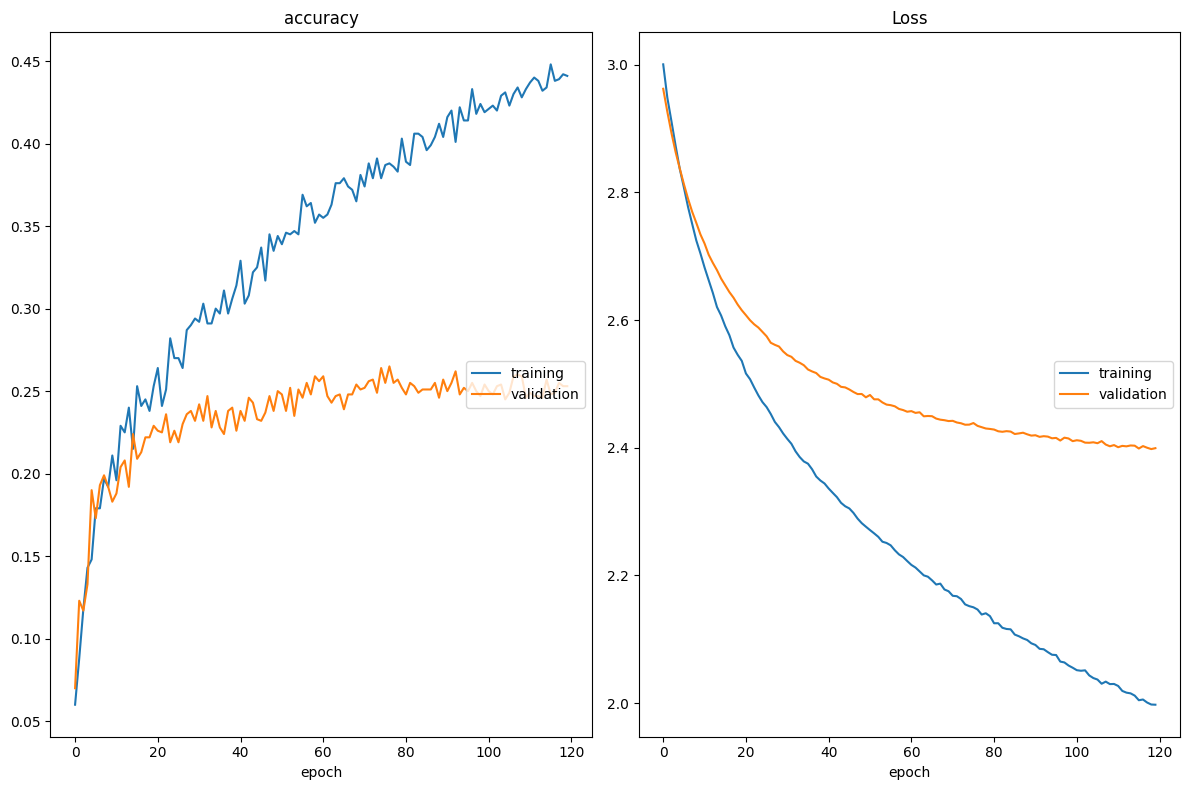

accuracy
	training         	 (min:    0.060, max:    0.448, cur:    0.441)
	validation       	 (min:    0.070, max:    0.265, cur:    0.253)
Loss
	training         	 (min:    1.997, max:    3.001, cur:    1.997)
	validation       	 (min:    2.398, max:    2.962, cur:    2.399)


In [ ]:
import torch.optim
import torchvision.transforms as transforms

batch_size = 16
n_epochs = 120
learningRate = 1e-3

# torch.nn.CrossEntropyLoss applies the softmax to the predictions by the model.
cost_function = torch.nn.CrossEntropyLoss()
model = LinearClassifier(32 * 32 * 3, len(trainset.categories))

# Basic SGD Optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

class Flatten(object):
  def __call__(self, input_tensor):
    return input_tensor.view(32 * 32 * 3)

transform = transforms.Compose([transforms.Resize((32, 32)),
                                transforms.ToTensor(),
                                Flatten()])

trainset = SUN20(split = 'train', transform = transform)
valset = SUN20(split = 'val', transform = transform)

train_loader = torch.utils.data.DataLoader(trainset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           pin_memory = True,
                                           num_workers = 2)
val_loader = torch.utils.data.DataLoader(valset,
                                         batch_size = batch_size,
                                         shuffle = False)

train_model(batch_size, n_epochs, learningRate,
            model, cost_function, optimizer, -1,
            train_loader, val_loader);

Se puede ver que este modelo realmente está aprendiendo la tarea, la precisión sigue aumentando y la pérdida tanto en los datos de entrenamiento como en los datos de validación sigue disminuyendo. A pesar de ser el clasificador lineal más simple, funciona en cierta medida: alcanza una precisión de aproximadamente el 26 % y parece que el entrenamiento comenzó a converger.

### **3. Redes Neuronales Convolucionales**

El clasificador que se utilizó en la sección anterior no es muy bueno. En esta sección, se define un nuevo clasificador que utiliza en su lugar una red neuronal convolucional. Esta red está diseñada para recibir imágenes como entrada con una resolución de 48x48.

In [ ]:
class ConvnetClassifier(torch.nn.Module):
    def __init__(self):
        super(ConvnetClassifier, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 128, kernel_size = (5, 5))
        self.conv2 = torch.nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3, 3))
        self.linear1 = torch.nn.Linear(in_features = 128 * 10 * 10, out_features = 256)
        self.linear2 = torch.nn.Linear(in_features = 256, out_features = 20)

    def forward(self, x):
        # First conv layer + maxpool2d + relu.
        x = self.conv1(x)
        x = torch.nn.functional.max_pool2d(x, (2, 2))
        x = torch.nn.functional.relu(x)

        # Second conv layer + maxpool2d + relu.
        x = self.conv2(x)
        x = torch.nn.functional.max_pool2d(x, (2, 2))
        x = torch.nn.functional.relu(x)

        # Vectorize except along the batch dimension.
        # You can always print here x.shape to see what it looks like.
        x = x.view(x.size(0), -1)

        # Pass through linear layers.
        x = self.linear1(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2(x)
        return x

# Test your model!
# Create dummy batch with 24 samples, where each is an image of size 3x48x48.
dummy_batch = torch.zeros(24, 3, 48, 48)
my_model = ConvnetClassifier()
predictions = my_model(dummy_batch)

# Seems like working to me.
print(dummy_batch.shape, predictions.shape)

torch.Size([24, 3, 48, 48]) torch.Size([24, 20])


## **Ejercicios**

#### **A.1 Entrenando la red neuronal convolucional**

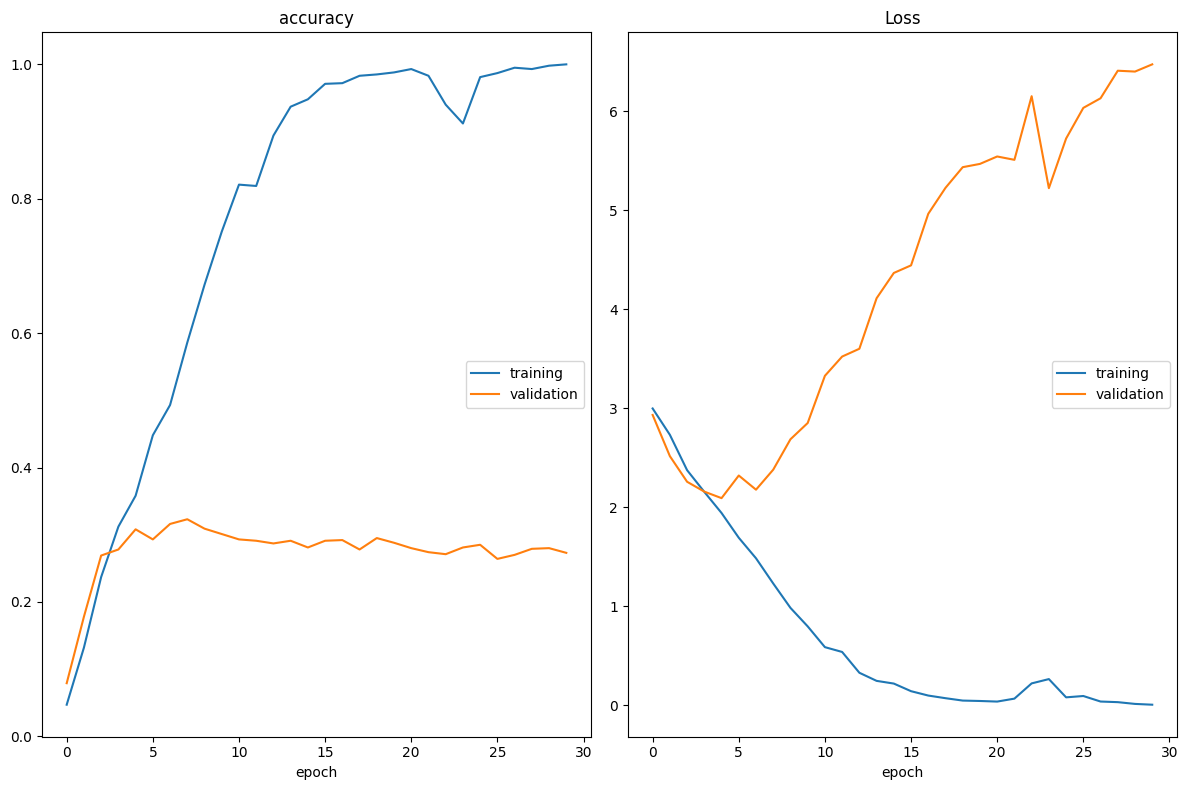

accuracy
	training         	 (min:    0.047, max:    1.000, cur:    1.000)
	validation       	 (min:    0.079, max:    0.323, cur:    0.273)
Loss
	training         	 (min:    0.003, max:    2.997, cur:    0.003)
	validation       	 (min:    2.091, max:    6.475, cur:    6.475)


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from livelossplot import PlotLosses

# Definir parámetros
batch_size = 16
n_epochs = 30
learning_rate = 1e-3

# Inicializar el modelo
model = ConvnetClassifier()

# Definir la función de costo
cost_function = torch.nn.CrossEntropyLoss()

# Inicializar el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Definir el transformador para ajustar el tamaño de las imágenes
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
])

# Cargar los datos
trainset = SUN20(split='train', transform=transform)
valset = SUN20(split='val', transform=transform)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=2)

# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
cost_function.to(device)

def train_model(batch_size, n_epochs, learning_rate, model, cost_function, optimizer, train_loader, val_loader):
    # Variables para controlar la mejor precisión
    best_accuracy = 0
    liveloss = PlotLosses()

    # Bucle de entrenamiento
    for epoch in range(n_epochs):
        logs = {}
        correct = 0
        cumulative_loss = 0
        n_samples = 0

        # Modo entrenamiento
        model.train()
        for (batch_id, (xb, yb)) in enumerate(train_loader):
            xb = xb.to(device)
            yb = yb.to(device)
            model.zero_grad()

            # Predicciones y pérdida
            predicted = model(xb)
            loss = cost_function(predicted, yb)
            cumulative_loss += loss.item()

            # Correctos y gradientes
            predicted_ = predicted.detach().softmax(dim=1)
            max_vals, max_ids = predicted_.max(dim=1)
            correct += (max_ids == yb).sum().cpu().item()
            n_samples += xb.size(0)
            loss.backward()
            optimizer.step()

            # Registro de estadísticas
            logs['loss'] = cumulative_loss / (batch_id + 1)
            logs['accuracy'] = correct / n_samples

        # Modo evaluación
        correct = 0
        cumulative_loss = 0
        n_samples = 0

        model.eval()
        with torch.no_grad():
            for (batch_id, (xb, yb)) in enumerate(val_loader):
                xb = xb.to(device)
                yb = yb.to(device)

                # Predicciones y pérdida
                predicted = model(xb)
                loss = cost_function(predicted, yb)
                cumulative_loss += loss.item()

                # Correctos
                predicted_ = predicted.detach().softmax(dim=1)
                max_vals, max_ids = predicted_.max(dim=1)
                correct += (max_ids == yb).sum().cpu().item()
                n_samples += xb.size(0)

                # Registro de estadísticas
                logs['val_loss'] = cumulative_loss / (batch_id + 1)
                logs['val_accuracy'] = correct / n_samples

        # Guardar el mejor modelo
        if logs['val_accuracy'] > best_accuracy:
            best_accuracy = logs['val_accuracy']
            torch.save(model.state_dict(), 'best_model.pth')

        # Actualizar gráfico
        liveloss.update(logs)
        liveloss.send()

# Entrenar el modelo
train_model(batch_size, n_epochs, learning_rate, model, cost_function, optimizer, train_loader, val_loader)


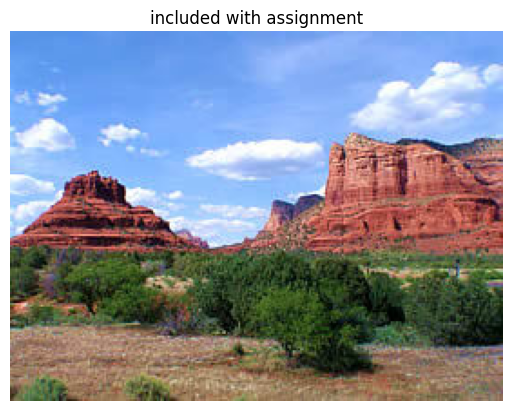

P("/a/arch") = 0.00
P("/b/bathroom") = 0.00
P("/b/butte") = 0.91
P("/d/dentists_office") = 0.00
P("/h/hot_spring") = 0.03
P("/j/jacuzzi/indoor") = 0.00
P("/l/laundromat") = 0.00
P("/l/lecture_room") = 0.00
P("/l/library/indoor") = 0.00
P("/l/lighthouse") = 0.04
P("/l/living_room") = 0.00
P("/m/mansion") = 0.01
P("/m/marsh") = 0.00
P("/m/mountain") = 0.00
P("/s/sauna") = 0.00
P("/s/shower") = 0.00
P("/s/skyscraper") = 0.00
P("/t/tower") = 0.00
P("/t/tree_house") = 0.00
P("/v/volcano") = 0.00


In [ ]:
# Including an example prediction just for your reference to see the model is really working.

import matplotlib.pyplot as plt

input_image_id = 113

# Load the validation set in case not loaded.
valset = SUN20(split = 'val')

# Sample
x,y = valset[input_image_id]

# Process input and add a dummy batch dimension.
xp = transform(x)[None, :].to(device)

predictions = model(xp).softmax(dim = 1)

plt.figure();plt.title("included with assignment");plt.imshow(x);plt.axis(False);plt.show();

# Show predictions from this model.
for i in range(0, len(trainset.categories)):
  score = predictions[0, i].item()
  category = trainset.categories[i]
  print('P("{0}") = {1:.2f}'.format(category, score))

#### **A.2 Mostrar resultados del modelo entrenado previamente**
Se mostró los resultados del modelo entrenado mostrando en la sección previa las 20 imágenes principales del conjunto de validación que el modelo predice como `butte`. A continuación, se muestran los puntajes predichos para cada uno de ellos de alguna manera y se coloca un recuadro verde alrededor de las imágenes que efectivamente son `butte` y un recuadro rojo alrededor de las imágenes cuya etiqueta verdadera no es `butte`. Se usa la clase ImageDraw de la biblioteca Pillow para dibujar un rectángulo y dibujar algo de texto en las imágenes.

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# Define a function to draw a rectangle and label on an image.
def draw_rectangle(image, is_true_class):
    draw = ImageDraw.Draw(image)
    color = 'green' if is_true_class else 'red'
    draw.rectangle([0, 0, image.width, image.height], outline=color, width=5)
    draw.text((10, 10), 'butte', fill=color)
    return image

# Load the validation set.
valset = SUN20(split='val')

# Store the indices of images predicted as 'butte' with their scores.
predicted_butte_images = []
predicted_butte_scores = []

for i in range(len(valset)):
    x, y = valset[i]
    xp = transform(x)[None, :].to(device)
    predictions = model(xp).softmax(dim=1)
    score = predictions[0, trainset.categories.index('/b/butte')].item()

    if score > 0.2:  # Threshold to consider it as predicted 'butte'
        predicted_butte_images.append((x, y, score))

        if len(predicted_butte_images) == 20:
            break

# Plot the images with predictions.
plt.figure(figsize=(20, 20))

for idx, (image, true_label, score) in enumerate(predicted_butte_images):
    is_true_class = true_label == trainset.categories.index('/b/butte')
    image_with_box = draw_rectangle(image.copy(), is_true_class)

    plt.subplot(5, 4, idx + 1)
    plt.imshow(image_with_box)
    plt.title(f'Score: {score:.2f}')
    plt.axis('off')

plt.show()


Output hidden; open in https://colab.research.google.com to view.

#### **A.3 Definir y entrenar una mejor red neuronal convolucional**
En esta sección, se define y entrena una red Convolucional (CNN).

In [ ]:
import torch
import torchvision

class SceneClassifier(torch.nn.Module):
    def __init__(self):
        super(SceneClassifier, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = torch.nn.BatchNorm2d(32)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = torch.nn.BatchNorm2d(64)
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = torch.nn.BatchNorm2d(128)
        self.conv4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = torch.nn.BatchNorm2d(256)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(256 * 3 * 3, 512)
        self.fc2 = torch.nn.Linear(512, 20)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.nn.functional.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.nn.functional.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.nn.functional.relu(self.bn4(self.conv4(x))))
        x = x.view(-1, 256 * 3 * 3)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create the model instance
model = SceneClassifier()

# Count the number of parameters
count_params = sum(p.numel() for p in model.parameters())
print(count_params)

1579796


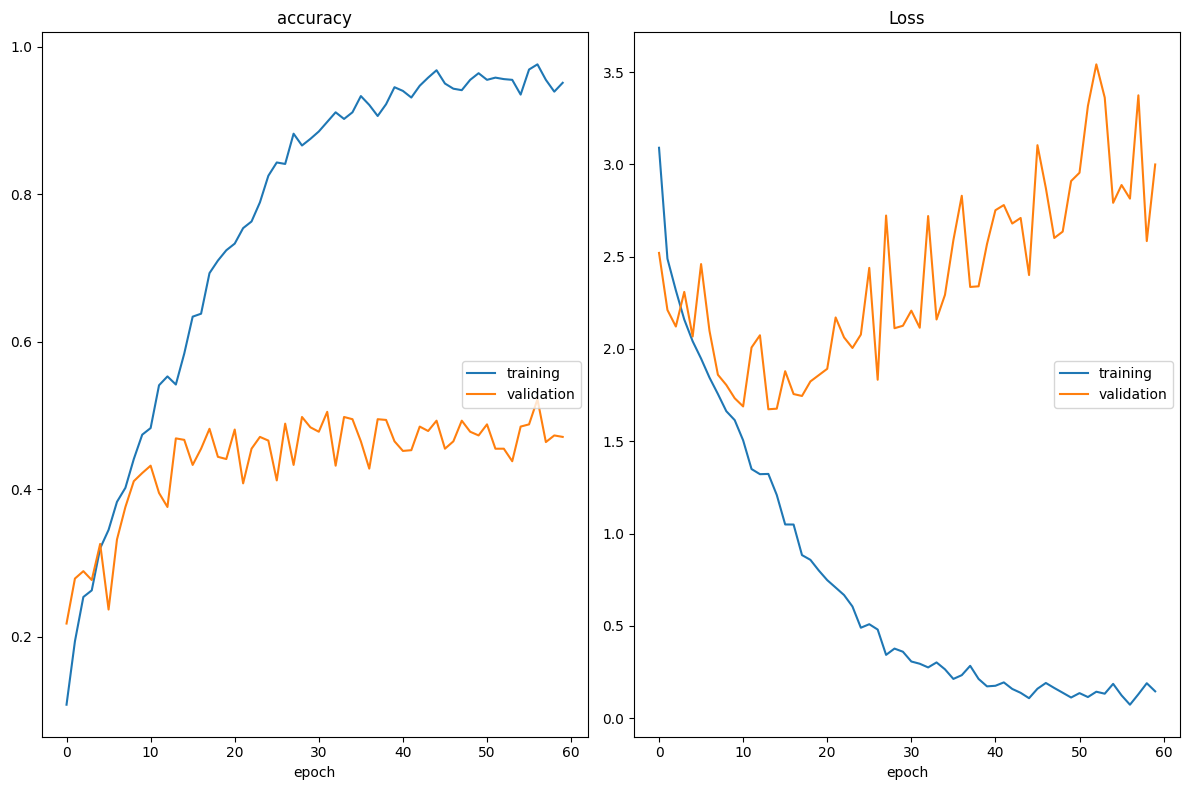

accuracy
	training         	 (min:    0.108, max:    0.976, cur:    0.951)
	validation       	 (min:    0.218, max:    0.522, cur:    0.471)
Loss
	training         	 (min:    0.072, max:    3.090, cur:    0.145)
	validation       	 (min:    1.673, max:    3.542, cur:    3.000)


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from livelossplot import PlotLosses
from PIL import ImageDraw

# Definir parámetros
batch_size = 16
n_epochs = 60
learning_rate = 1e-3

# Inicializar el modelo
model = SceneClassifier()

# Definir la función de costo
cost_function = torch.nn.CrossEntropyLoss()

# Inicializar el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Definir el transformador para ajustar el tamaño de las imágenes
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
])

# Cargar los datos
trainset = SUN20(split='train', transform=transform)
valset = SUN20(split='val', transform=transform)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=2)

# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
cost_function.to(device)

def train_model(batch_size, n_epochs, learning_rate, model, cost_function, optimizer, train_loader, val_loader):
    # Variables para controlar la mejor precisión
    best_accuracy = 0
    liveloss = PlotLosses()

    # Bucle de entrenamiento
    for epoch in range(n_epochs):
        logs = {}
        correct = 0
        cumulative_loss = 0
        n_samples = 0

        # Modo entrenamiento
        model.train()
        for (batch_id, (xb, yb)) in enumerate(train_loader):
            xb = xb.to(device)
            yb = yb.to(device)
            model.zero_grad()

            # Predicciones y pérdida
            predicted = model(xb)
            loss = cost_function(predicted, yb)
            cumulative_loss += loss.item()

            # Correctos y gradientes
            predicted_ = predicted.detach().softmax(dim=1)
            max_vals, max_ids = predicted_.max(dim=1)
            correct += (max_ids == yb).sum().cpu().item()
            n_samples += xb.size(0)
            loss.backward()
            optimizer.step()

            # Registro de estadísticas
            logs['loss'] = cumulative_loss / (batch_id + 1)
            logs['accuracy'] = correct / n_samples

        # Modo evaluación
        correct = 0
        cumulative_loss = 0
        n_samples = 0

        model.eval()
        with torch.no_grad():
            for (batch_id, (xb, yb)) in enumerate(val_loader):
                xb = xb.to(device)
                yb = yb.to(device)

                # Predicciones y pérdida
                predicted = model(xb)
                loss = cost_function(predicted, yb)
                cumulative_loss += loss.item()

                # Correctos
                predicted_ = predicted.detach().softmax(dim=1)
                max_vals, max_ids = predicted_.max(dim=1)
                correct += (max_ids == yb).sum().cpu().item()
                n_samples += xb.size(0)

                # Registro de estadísticas
                logs['val_loss'] = cumulative_loss / (batch_id + 1)
                logs['val_accuracy'] = correct / n_samples

        # Guardar el mejor modelo
        if logs['val_accuracy'] > best_accuracy:
            best_accuracy = logs['val_accuracy']
            torch.save(model.state_dict(), 'best_model.pth')

        # Actualizar gráfico
        liveloss.update(logs)
        liveloss.send()

# Entrenar el modelo
train_model(batch_size, n_epochs, learning_rate, model, cost_function, optimizer, train_loader, val_loader)


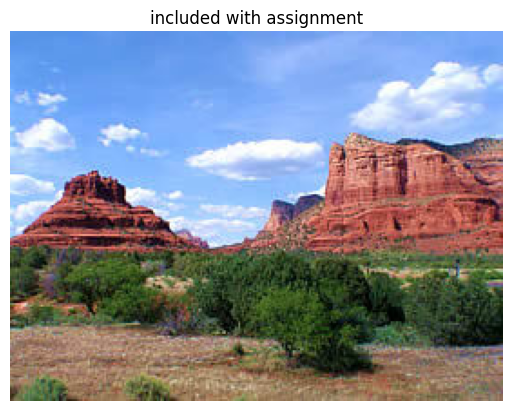

P("/a/arch") = 0.00
P("/b/bathroom") = 0.00
P("/b/butte") = 1.00
P("/d/dentists_office") = 0.00
P("/h/hot_spring") = 0.00
P("/j/jacuzzi/indoor") = 0.00
P("/l/laundromat") = 0.00
P("/l/lecture_room") = 0.00
P("/l/library/indoor") = 0.00
P("/l/lighthouse") = 0.00
P("/l/living_room") = 0.00
P("/m/mansion") = 0.00
P("/m/marsh") = 0.00
P("/m/mountain") = 0.00
P("/s/sauna") = 0.00
P("/s/shower") = 0.00
P("/s/skyscraper") = 0.00
P("/t/tower") = 0.00
P("/t/tree_house") = 0.00
P("/v/volcano") = 0.00


In [ ]:
import matplotlib.pyplot as plt

input_image_id = 113

# Load the validation set in case not loaded.
valset = SUN20(split = 'val')

# Sample
x,y = valset[input_image_id]

# Process input and add a dummy batch dimension.
xp = transform(x)[None, :].to(device)

predictions = model(xp).softmax(dim = 1)

plt.figure();plt.title("included with assignment");plt.imshow(x);plt.axis(False);plt.show();

# Show predictions from this model.
for i in range(0, len(trainset.categories)):
  score = predictions[0, i].item()
  category = trainset.categories[i]
  print('P("{0}") = {1:.2f}'.format(category, score))

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# Define a function to draw a rectangle and label on an image.
def draw_rectangle(image, is_true_class):
    draw = ImageDraw.Draw(image)
    color = 'green' if is_true_class else 'red'
    draw.rectangle([0, 0, image.width, image.height], outline=color, width=5)
    draw.text((10, 10), 'butte', fill=color)
    return image

# Load the validation set.
valset = SUN20(split='val')

# Store the indices of images predicted as 'butte' with their scores.
predicted_butte_images = []
predicted_butte_scores = []

for i in range(len(valset)):
    x, y = valset[i]
    xp = transform(x)[None, :].to(device)
    predictions = model(xp).softmax(dim=1)
    score = predictions[0, trainset.categories.index('/b/butte')].item()

    if score > 0.2:  # Threshold to consider it as predicted 'butte'
        predicted_butte_images.append((x, y, score))

        if len(predicted_butte_images) == 20:
            break

# Plot the images with predictions.
plt.figure(figsize=(20, 20))

for idx, (image, true_label, score) in enumerate(predicted_butte_images):
    is_true_class = true_label == trainset.categories.index('/b/butte')
    image_with_box = draw_rectangle(image.copy(), is_true_class)

    plt.subplot(5, 4, idx + 1)
    plt.imshow(image_with_box)
    plt.title(f'Score: {score:.2f}')
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### **A.4 Entrenar una red neuronal existente a partir de modelos de Pytorch**

Pytorch contiene una amplia biblioteca de modelos preentrenados, modelos que ya se han entrenado en un conjunto de datos de gran escala, a menudo con millones de imágenes y miles de categorías. Se reutiliza uno de estos modelos con sus pesos preentrenados y "afine" el modelo para que funcione bien en el conjunto de datos SUN20 reemplazando la última capa con una capa que prediga 20 resultados y ejecute un par de rondas de ajuste hasta lograr un clasificador que funcione con una precisión de aproximadamente el 90 %. Se usa EfficientNet V2 Medium Size para obtener el rendimiento que se muestra a continuación, con un 91,8 % en solo 7 épocas.

Algunos links de utilidad son:

 * [Aprendizaje Profundo con Imágenes](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
 * [Fine-tunning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
 * [Modelos Pytorch Models](https://pytorch.org/vision/stable/models.html)
 * [Aumento de Datos](https://towardsdatascience.com/image-augmentation-using-python-numpy-opencv-and-skimage-ef027e9898da)
 * [DataSet y DataLoader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
 * [Capas Pytorch](https://pytorch.org/docs/stable/nn.html)


In [18]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
from livelossplot import PlotLosses

# Definir parámetros
batch_size = 16
n_epochs = 7
learning_rate = 1e-4

# Definir el transformador para ajustar el tamaño de las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet requiere 224x224
    transforms.ToTensor(),
])

# Cargar los datos
trainset = SUN20(split='train', transform=transform)
valset = SUN20(split='val', transform=transform)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=2)

# Inicializar el modelo preentrenado
model = models.efficientnet_v2_m(pretrained=True)

# Reemplazar la última capa para que se ajuste a 20 clases
num_ftrs = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(num_ftrs, 20)

# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Definir la función de costo y el optimizador
cost_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [00:01<00:00, 140MB/s]


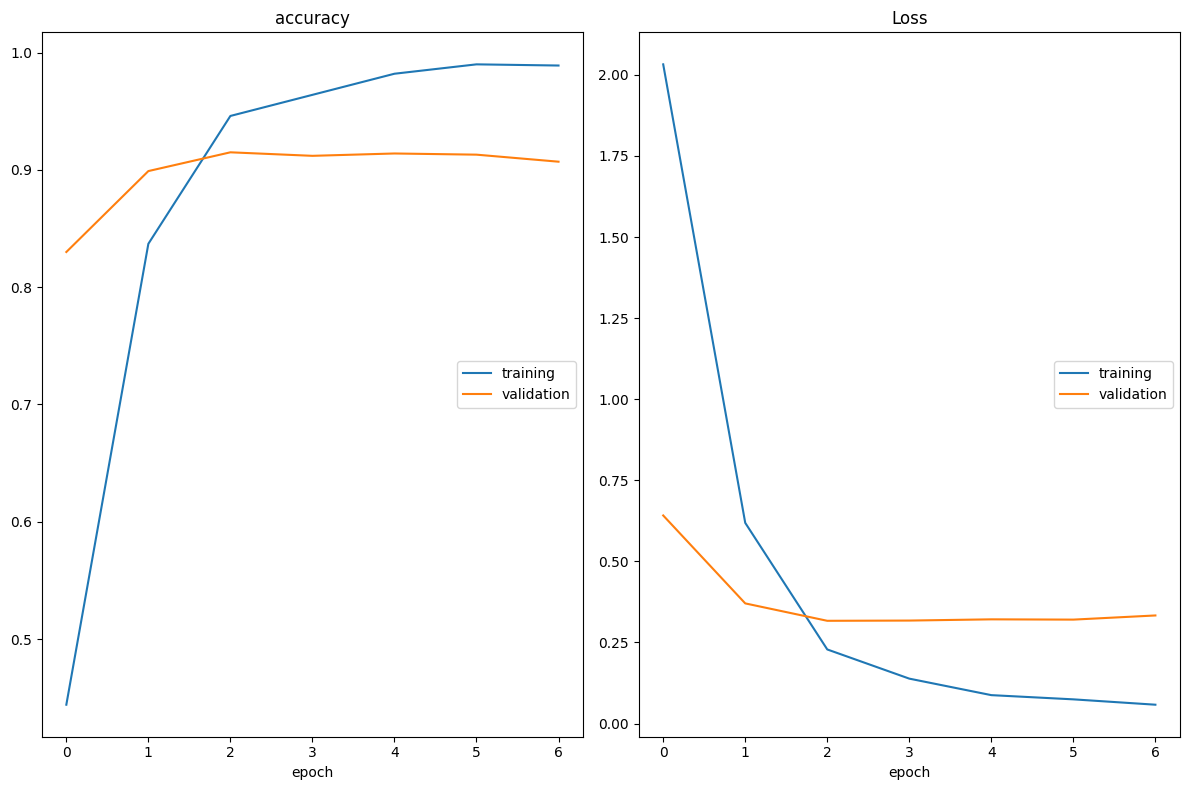

accuracy
	training         	 (min:    0.444, max:    0.990, cur:    0.989)
	validation       	 (min:    0.830, max:    0.915, cur:    0.907)
Loss
	training         	 (min:    0.058, max:    2.032, cur:    0.058)
	validation       	 (min:    0.317, max:    0.642, cur:    0.333)
Epoch 7 duration: 28.238893747329712


In [19]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
from livelossplot import PlotLosses
import time

# Definir parámetros
batch_size = 16
n_epochs = 7
learning_rate = 1e-4

# Inicializar el modelo preentrenado y ajustar la última capa
model = models.efficientnet_v2_m(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(num_ftrs, 20)

# Definir la función de costo
cost_function = torch.nn.CrossEntropyLoss()

# Inicializar el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Definir el transformador para ajustar el tamaño de las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet requiere 224x224
    transforms.ToTensor(),
])

# Cargar los datos
trainset = SUN20(split='train', transform=transform)
valset = SUN20(split='val', transform=transform)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
cost_function.to(device)

def train_model(batch_size, n_epochs, learning_rate, model, cost_function, optimizer, train_loader, val_loader):
    best_accuracy = 0
    liveloss = PlotLosses()

    for epoch in range(n_epochs):
        start_time = time.time()
        logs = {}
        correct = 0
        cumulative_loss = 0
        n_samples = 0

        # Modo entrenamiento
        model.train()
        for (batch_id, (xb, yb)) in enumerate(train_loader):
            xb = xb.to(device)
            yb = yb.to(device)
            model.zero_grad()

            predicted = model(xb)
            loss = cost_function(predicted, yb)
            cumulative_loss += loss.item()

            predicted_ = predicted.detach().softmax(dim=1)
            max_vals, max_ids = predicted_.max(dim=1)
            correct += (max_ids == yb).sum().cpu().item()
            n_samples += xb.size(0)
            loss.backward()
            optimizer.step()

            logs['loss'] = cumulative_loss / (batch_id + 1)
            logs['accuracy'] = correct / n_samples

        # Modo evaluación
        correct = 0
        cumulative_loss = 0
        n_samples = 0

        model.eval()
        with torch.no_grad():
            for (batch_id, (xb, yb)) in enumerate(val_loader):
                xb = xb.to(device)
                yb = yb.to(device)

                predicted = model(xb)
                loss = cost_function(predicted, yb)
                cumulative_loss += loss.item()

                predicted_ = predicted.detach().softmax(dim=1)
                max_vals, max_ids = predicted_.max(dim=1)
                correct += (max_ids == yb).sum().cpu().item()
                n_samples += xb.size(0)

                logs['val_loss'] = cumulative_loss / (batch_id + 1)
                logs['val_accuracy'] = correct / n_samples

        if logs['val_accuracy'] > best_accuracy:
            best_accuracy = logs['val_accuracy']
            torch.save(model.state_dict(), 'best_model.pth')

        liveloss.update(logs)
        liveloss.send()
        print(f"Epoch {epoch + 1} duration: {time.time() - start_time}")

# Entrenar el modelo
train_model(batch_size, n_epochs, learning_rate, model, cost_function, optimizer, train_loader, val_loader)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-20-3186ac3ac002>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

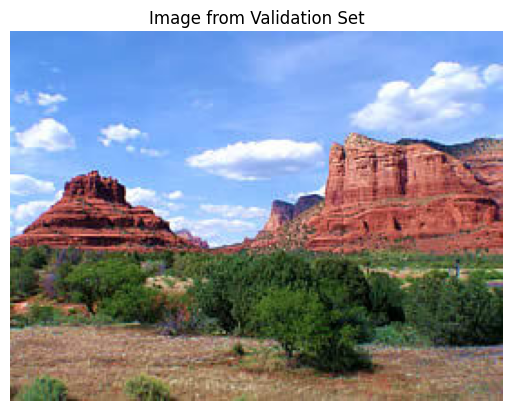

Predicciones para la imagen:
P("/a/arch") = 0.00
P("/b/bathroom") = 0.00
P("/b/butte") = 0.99
P("/d/dentists_office") = 0.00
P("/h/hot_spring") = 0.00
P("/j/jacuzzi/indoor") = 0.00
P("/l/laundromat") = 0.00
P("/l/lecture_room") = 0.00
P("/l/library/indoor") = 0.00
P("/l/lighthouse") = 0.00
P("/l/living_room") = 0.00
P("/m/mansion") = 0.00
P("/m/marsh") = 0.00
P("/m/mountain") = 0.00
P("/s/sauna") = 0.00
P("/s/shower") = 0.00
P("/s/skyscraper") = 0.00
P("/t/tower") = 0.00
P("/t/tree_house") = 0.00
P("/v/volcano") = 0.00


In [20]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import models

# Definir el transformador para ajustar el tamaño de las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Inicializar el modelo preentrenado y ajustar la última capa
model = models.efficientnet_v2_m(pretrained=False)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(num_ftrs, 20)

# Cargar los pesos del modelo entrenado
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Definir el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Cargar el conjunto de datos de validación
valset = SUN20(split='val')

# Elegir una imagen de validación para probar
input_image_id = 113
x, y = valset[input_image_id]

# Procesar la imagen de entrada y añadir una dimensión de lote
xp = transform(x)[None, :].to(device)

# Realizar la inferencia
with torch.no_grad():
    predictions = model(xp).softmax(dim=1)

# Mostrar la imagen
plt.figure()
plt.title("Image from Validation Set")
plt.imshow(x)
plt.axis('off')
plt.show()

# Mostrar las predicciones del modelo
print("Predicciones para la imagen:")
for i in range(len(valset.categories)):
    score = predictions[0, i].item()
    category = valset.categories[i]
    print(f'P("{category}") = {score:.2f}')
